# How long a PageView event took to run and how to find if an error ocurred in its execution

### Objects used in this study: [Lightning Page View](https://developer.salesforce.com/docs/atlas.en-us.object_reference.meta/object_reference/sforce_api_objects_eventlogfile_lightningpageview.htm)

In [2]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [3]:
#Reading data
page_view = pd.read_csv("./data/ELF/LightningPageView/2022-06-20_LightningPageView.csv")

In [6]:
#Page View examples
page_view.head(3)

,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,SESSION_KEY,LOGIN_KEY,USER_TYPE,APP_NAME,...,PREVPAGE_ENTITY_TYPE,PREVPAGE_CONTEXT,PREVPAGE_URL,PREVPAGE_APP_NAME,TARGET_UI_ELEMENT,PARENT_UI_ELEMENT,GRANDPARENT_UI_ELEMENT,TIMESTAMP_DERIVED,USER_ID_DERIVED,CLIENT_IP
0,LightningPageView,2.022062e+13,TID:354812000006d78c47,00D0b000000GaMp,0056P000000xXGc,NaN,DkrMLnselIW4a5EP,sJxFELZ4Maod2+Dp,Standard,one:one,...,NaN,home:landing,/lightning/page/home,PSA_Dell,NaN,NaN,NaN,2022-06-20T00:00:03.155Z,0056P000000xXGcQAM,1.158.84.17
1,LightningPageView,2.022062e+13,TID:58030194000009ce81,00D0b000000GaMp,0050b000004KP2Y,NaN,FNYwFEC/js/SJBfr,CouvuCikaCZftK4Z,Standard,one:one,...,Case,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005wV26QAE/view,LightningService,NaN,NaN,NaN,2022-06-20T00:00:05.696Z,0050b000004KP2YAAW,143.166.255.112
2,LightningPageView,2.022062e+13,TID:12985703000004ffe6,00D0b000000GaMp,0050b000004K6qi,NaN,kli/tj2J178nuyC/,JO3VQlVLEQ2oZRfV,Standard,one:one,...,WorkOrder,one:recordHomeFlexipage,/lightning/r/WorkOrder/0WO6P0000022kdHWAQ/view...,LightningService,NaN,NaN,NaN,2022-06-20T00:00:17.340Z,0050b000004K6qiAAC,132.237.180.18


In [9]:
#Indexing the data by UserId and SessionKey
page_view_indexed = page_view.set_index(['USER_ID_DERIVED', 'SESSION_KEY'])
page_view_indexed.head(3)

,,EVENT_TYPE,TIMESTAMP,REQUEST_ID,ORGANIZATION_ID,USER_ID,CLIENT_ID,LOGIN_KEY,USER_TYPE,APP_NAME,DEVICE_PLATFORM,...,PREVPAGE_ENTITY_ID,PREVPAGE_ENTITY_TYPE,PREVPAGE_CONTEXT,PREVPAGE_URL,PREVPAGE_APP_NAME,TARGET_UI_ELEMENT,PARENT_UI_ELEMENT,GRANDPARENT_UI_ELEMENT,TIMESTAMP_DERIVED,CLIENT_IP
USER_ID_DERIVED,SESSION_KEY,,,,,,,,,,,,,,,,,,,,,
0056P000000xXGcQAM,DkrMLnselIW4a5EP,LightningPageView,2.022062e+13,TID:354812000006d78c47,00D0b000000GaMp,0056P000000xXGc,NaN,sJxFELZ4Maod2+Dp,Standard,one:one,SFX:BROWSER:DESKTOP,...,NaN,NaN,home:landing,/lightning/page/home,PSA_Dell,NaN,NaN,NaN,2022-06-20T00:00:03.155Z,1.158.84.17
0050b000004KP2YAAW,FNYwFEC/js/SJBfr,LightningPageView,2.022062e+13,TID:58030194000009ce81,00D0b000000GaMp,0050b000004KP2Y,NaN,CouvuCikaCZftK4Z,Standard,one:one,SFX:BROWSER:DESKTOP,...,5006P000005wV26QAE,Case,one:recordHomeFlexipage2Wrapper,/lightning/r/Case/5006P000005wV26QAE/view,LightningService,NaN,NaN,NaN,2022-06-20T00:00:05.696Z,143.166.255.112
0050b000004K6qiAAC,kli/tj2J178nuyC/,LightningPageView,2.022062e+13,TID:12985703000004ffe6,00D0b000000GaMp,0050b000004K6qi,NaN,JO3VQlVLEQ2oZRfV,Standard,one:one,SFX:BROWSER:DESKTOP,...,0WO6P0000022kdHWAQ,WorkOrder,one:recordHomeFlexipage,/lightning/r/WorkOrder/0WO6P0000022kdHWAQ/view...,LightningService,NaN,NaN,NaN,2022-06-20T00:00:17.340Z,132.237.180.18


In [17]:
#Filtering just the time spend of the Events
page_view_time = page_view_indexed[['DURATION','EFFECTIVE_PAGE_TIME']]
page_view_time

,,DURATION,EFFECTIVE_PAGE_TIME
USER_ID_DERIVED,SESSION_KEY,,
0056P000000xXGcQAM,DkrMLnselIW4a5EP,4273.0,4268.0
0050b000004KP2YAAW,FNYwFEC/js/SJBfr,2497.0,2496.0
0050b000004K6qiAAC,kli/tj2J178nuyC/,461.0,459.0
0051P000003jYNOQA2,13BZwFCUcj0WV/FF,889.0,886.0
0052R000009nJBDQA2,SFUtGUXsW73SFMp1,2514.0,2513.0
...,...,...,...
0051P000003gGaJQAU,7l79yoIIpgXhppu9,548.0,546.0
0050b000004K6s0AAC,FFqIXSkd1lg3R12W,619.0,617.0
0050b000004KCW0AAO,zSlTWpkr6eIMM1jJ,13176.0,13175.0


#### According to the documentation, the EFFECTIVE_PAGE_TIME (alternative to DURATION that is current deprecated) will be 0/null if there's an error in any moment of the Page execution. Even though deprecated, due that behavior, the column DURATION showed to be more accurated to tell the true rum time of the page, regardless any errors.

## Mean Runtime of a successful Page

In [25]:
m = page_view_time.EFFECTIVE_PAGE_TIME.mean()/1000
print(f'The mean run-time of a successful Page rendered is {m}')

The mean run-time of a successful Page rendered is 2.1455153457653457


## Percentage of Erros in the Pages

In [33]:
page_view_error_log = page_view_indexed[page_view_indexed.EFFECTIVE_PAGE_TIME_DEVIATION == True][['EFFECTIVE_PAGE_TIME_DEVIATION_REASON']]
page_view_error_log

,,EFFECTIVE_PAGE_TIME_DEVIATION_REASON
USER_ID_DERIVED,SESSION_KEY,
0050b000004KGjHAAW,WgkVyJezqqy8eqZD,PreviousPageNotLoaded
0050b000004KRPiAAO,hXXfG+/yor4lYGG6,PageNotLoaded
0056P0000011gfCQAQ,LBIGGXbZv2u2MOLk,PageNotLoaded
0051P000003jYtEQAU,JykzX/dglla1evuC,PreviousPageNotLoaded
0052R000009Tn59QAC,BnKJgCXZBKSbTKGI,PageInBackgroundBeforeLoaded
...,...,...
0052R000009TrcOQAS,Rn6fK6IeBggGhM+G,PageNotLoaded
0056P000000Dgo0QAC,e4R9Aesy0mVFxIpp,PreviousPageNotLoaded
0056P000000xUzIQAU,GBc0h3B8uAmyEGDN,PreviousPageNotLoaded


In [38]:
#Percentage of each Error Type
page_view_error_log.EFFECTIVE_PAGE_TIME_DEVIATION_REASON.value_counts(normalize=True)

PreviousPageNotLoaded                          0.510060
PageNotLoaded                                  0.215565
InteractionBeforePageLoaded|click              0.194782
PageInBackgroundBeforeLoaded                   0.062790
InteractionBeforePageLoaded|synthetic-hover    0.012381
PageHasError                                   0.004422
Name: EFFECTIVE_PAGE_TIME_DEVIATION_REASON, dtype: float64

## Type of Errors:
#### PAGE_IN_DOM
    The page was loaded from a cache.
#### PAGE_NOT_LOADED
    If a customer navigates away from a page while loading processes are in progress, the page doesn't finish loading.
#### PREVIOUS_PAGE_NOT_LOADED
    When navigating to a new page, and the previous page hasn't completed loading, the next page is considered to have a deviation. Incomplete loading processes on a previous page can affect how the next page loads.
#### INTERACTIONS_BEFORE_PAGE_LOADED
    A user interacts with a page element before the page is fully loaded.
#### PAGE_IN_BACKGROUND_BEFORE_LOADED
    A background loading process runs on a page. Background processes can run when users don't interact with a page, such as when they navigate to another browser tab.

#  Error Types pie chart

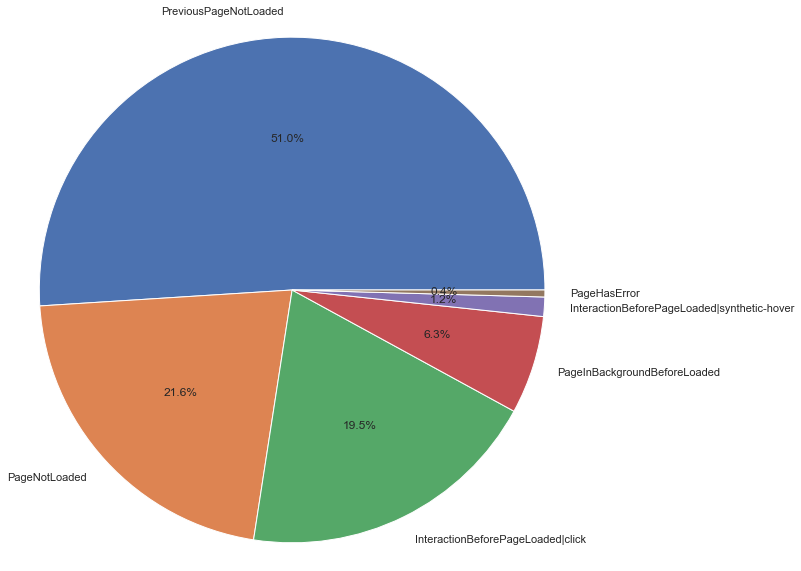

In [50]:
sizes = list(page_view_error_log.EFFECTIVE_PAGE_TIME_DEVIATION_REASON.value_counts())
labels = list(page_view_error_log.EFFECTIVE_PAGE_TIME_DEVIATION_REASON.value_counts().index)

fig, ax = plt.subplots(figsize=(10,10))

ax.pie(sizes, labels=labels, autopct='%1.1f%%')
ax.axis('equal')

plt.show()

In [ ]:
page_view_indexed.to_csv('Page_View_by_USER_ID_DERIVED-SESSI')